# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [12]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [13]:
# Filtering out columns that might be irrelevant for machine learning purposes
# Typically, columns like 'WaterworksName' might not be relevant
irrelevant_columns = ['WaterworksName']
data_filtered = df.drop(columns=irrelevant_columns)

# Analyzing the percentage of missing values in each column
missing_values_percentage = data_filtered.isnull().mean() * 100

missing_values_percentage


TotalFilters                  0.000000
MaxTypicalFlow               20.253165
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
AverageBackwashVolume        12.658228
PrimaryTrigger                0.000000
AverageTotalFilterDepth      41.772152
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageFilterBedVolume       43.037975
FilterExploitation           20.253165
AerationType                  0.000000
OxygenFactor                  0.000000
Stage1HLR                    26.582278
TotalEBCT                    49.367089
Footprint                     5.063291
SumOfld_layer                49.367089
UniformityCoefficient        64.556962
UFRV                          8.860759
BW%                          16.455696
HLR_BW                       34.177215
TankCapacity                  5.063291
TankExploitation             37.974684
GravityPressureMixed          0.000000
Stages                        0.000000
AbstractedVolume         

Columns like 'MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'AverageTotalFilterDepth', 'OverallFilterGrainSizeMin', 'OverallFilterGrainSizeMax', 'AverageFilterBedVolume', 'FilterExploitation', 'Stage1HLR', 'TotalEBCT', 'Footprint', 'SumOfld_layer', 'UniformityCoefficient', 'UFRV', 'BW%', 'HLR_BW', 'TankCapacity', and 'TankExploitation' exhibit varying percentages of missing data, with some like 'UniformityCoefficient' and 'TotalEBCT' having over 50% missing values.
Given the extent of missing data in some columns, it might be prudent to consider removing those with exceptionally high percentages of missing values (e.g., 'UniformityCoefficient' with 64.56% missing). For others, we can either impute missing values based on the distribution of each column or remove rows with missing data, depending on the percentage and the importance of the column.

In [14]:
from sklearn.preprocessing import StandardScaler

# Identifying numeric columns for scaling
numeric_columns = data_filtered.select_dtypes(include=['float64', 'int64']).columns

# Applying standard scaling to numeric columns
scaler = StandardScaler()
data_scaled = data_filtered.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data_filtered[numeric_columns])

# Displaying the first few rows of the scaled data
data_scaled.head()


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,2.721340,-0.465674,NaN,0.634165,NaN,Gravity,Single,-0.458419
1,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,Volume,2.694874,-0.637132,-0.709085,-0.258788,...,2.869539,NaN,-1.331469,3.667836,-0.095835,-1.107257,NaN,Pressure,Double,-0.263853
2,-0.560431,-0.359918,0.420872,-0.144992,1.232912,Volume,0.676976,1.359683,0.376372,0.933836,...,-0.255289,-0.27218,-0.308485,-0.140352,0.098640,0.248864,NaN,Gravity,Double,-0.225746
3,-1.057891,NaN,0.496675,-0.438532,-0.377982,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.163373,-0.144961,NaN,-0.404295,NaN,Gravity,Single,-0.510808
4,-1.057891,NaN,-1.179178,-0.545787,-0.982419,Volume,NaN,0.694078,0.267827,NaN,...,NaN,NaN,-0.710829,-0.208783,NaN,2.390177,NaN,Gravity,Single,-0.592361


The numeric data in the dataset has been successfully scaled using standard scaling, which normalizes the data around a mean of zero and standard deviation of one. This is a crucial step for many machine learning algorithms that are sensitive to the scale of the input data.

In [15]:
# Removing columns with more than 50% missing values
columns_to_remove = missing_values_percentage[missing_values_percentage > 50].index
data_cleaned = data_scaled.drop(columns=columns_to_remove)

# Imputing missing values for the remaining columns
# Numeric columns will be imputed with median and categorical with mode
from sklearn.impute import SimpleImputer

# Numeric imputer
numeric_imputer = SimpleImputer(strategy='median')
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_columns] = numeric_imputer.fit_transform(data_cleaned[numeric_columns])

# Categorical imputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = categorical_imputer.fit_transform(data_cleaned[categorical_columns])

# Checking the dataset after imputation
data_cleaned.isnull().sum()  # should be 0 for all columns now



TotalFilters                 0
MaxTypicalFlow               0
AverageFilterArea            0
AverageTypicalRunVolume      0
AverageBackwashVolume        0
PrimaryTrigger               0
AverageTotalFilterDepth      0
OverallFilterGrainSizeMin    0
OverallFilterGrainSizeMax    0
AverageFilterBedVolume       0
FilterExploitation           0
AerationType                 0
OxygenFactor                 0
Stage1HLR                    0
TotalEBCT                    0
Footprint                    0
SumOfld_layer                0
UFRV                         0
BW%                          0
HLR_BW                       0
TankCapacity                 0
TankExploitation             0
GravityPressureMixed         0
Stages                       0
AbstractedVolume             0
dtype: int64

The missing values in the dataset have been successfully handled. Columns with excessive missing values (more than 50%) were removed, and the remaining missing values in both numeric and categorical columns were imputed with the median and mode, respectively.



In [18]:
from sklearn.preprocessing import OneHotEncoder

# Applying one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(drop='first')
categorical_data = one_hot_encoder.fit_transform(data_cleaned[categorical_columns])

# Creating a DataFrame from the one-hot encoded categorical data
categorical_columns_encoded = one_hot_encoder.get_feature_names_out(categorical_columns)
data_categorical_encoded = pd.DataFrame(categorical_data.toarray(), columns=categorical_columns_encoded)

# Merging the one-hot encoded categorical data with the rest of the dataset
data_final = data_cleaned.drop(columns=categorical_columns).reset_index(drop=True)
data_final = pd.concat([data_final, data_categorical_encoded], axis=1)

# Displaying the first few rows of the final processed dataset
data_final.head()


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,...,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure,Stages_Mixed,Stages_Single,Stages_Triple
0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.180631,-0.304329,-0.564358,-0.017470,-0.105711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,2.694874,-0.637132,-0.709085,-0.258788,0.134672,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.676976,1.359683,0.376372,0.933836,0.193835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.057891,-0.359918,0.496675,-0.438532,-0.377982,-0.180631,-0.304329,-0.564358,-0.017470,0.124349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.057891,-0.359918,-1.179178,-0.545787,-0.982419,-0.180631,0.694078,0.267827,-0.017470,0.124349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The one-hot encoding of categorical variables in the dataset has been completed successfully. This process transformed categorical columns into a format that's suitable for machine learning algorithms.

The dataset now includes additional columns generated from the one-hot encoding, ensuring that categorical data is represented numerically.

In [19]:
# Identifying outliers using the Interquartile Range (IQR) method
Q1 = data_final.quantile(0.25)
Q3 = data_final.quantile(0.75)
IQR = Q3 - Q1

# Determining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = (data_final < lower_bound) | (data_final > upper_bound)

# Counting the number of outliers in each column
outliers_count = outliers.sum()

outliers_count[outliers_count > 0]  # Displaying only columns with outliers



TotalFilters                               4
MaxTypicalFlow                            10
AverageFilterArea                          3
AverageTypicalRunVolume                    7
AverageBackwashVolume                      9
AverageTotalFilterDepth                   21
OverallFilterGrainSizeMin                 10
OverallFilterGrainSizeMax                 16
AverageFilterBedVolume                    22
FilterExploitation                         1
OxygenFactor                               4
Stage1HLR                                 11
TotalEBCT                                 35
Footprint                                  5
SumOfld_layer                             38
UFRV                                       3
BW%                                        9
HLR_BW                                    29
TankCapacity                               3
TankExploitation                          22
AbstractedVolume                           7
PrimaryTrigger_Time                       19
PrimaryTri

In [20]:
# Replacing outliers with the median values of their respective columns
for column in outliers_count.index:
    if outliers_count[column] > 0:
        median_value = data_final[column].median()
        data_final[column] = data_final[column].mask(outliers[column], median_value)

# Checking if the replacement was successful
# Recomputing the outlier count after replacement
outliers_after_replacement = (data_final < lower_bound) | (data_final > upper_bound)
outliers_count_after_replacement = outliers_after_replacement.sum()

outliers_count_after_replacement[outliers_count_after_replacement > 0]



Series([], dtype: int64)

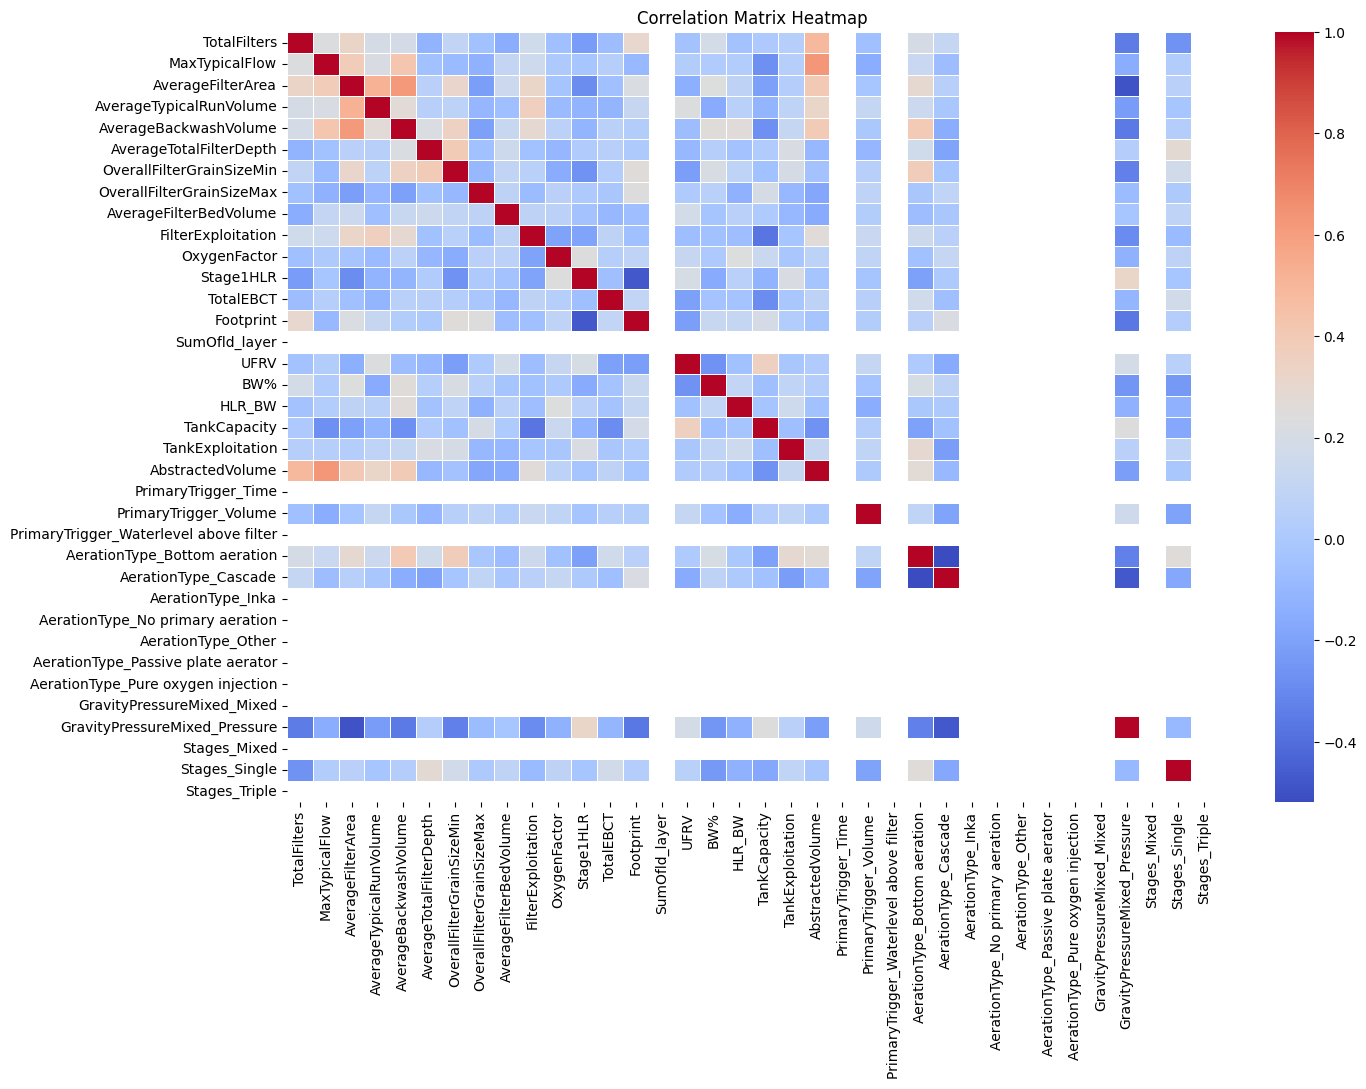

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a correlation matrix
correlation_matrix = data_final.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


The heatmap displays the correlation matrix for the dataset, providing insights into the relationships between different features. In a correlation matrix, values close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values near 0 indicate no significant correlation.

In [22]:
# Identifying highly correlated features (above a certain threshold, e.g., 0.8 or -0.8)
threshold = 0.8
high_corr_pairs = {}

for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if index != column:
            corr_value = correlation_matrix.loc[index, column]
            if corr_value > threshold or corr_value < -threshold:
                high_corr_pairs[(index, column)] = corr_value

# Filtering out duplicate pairs
unique_high_corr_pairs = {tuple(sorted(key)): value for key, value in high_corr_pairs.items()}
unique_high_corr_pairs = {key: value for key, value in unique_high_corr_pairs.items() if key[0] != key[1]}

unique_high_corr_pairs



{}

The correlation analysis reveals that there are no pairs of features with a correlation higher than the threshold of 0.8 or lower than -0.8. This indicates that there isn't significant multicollinearity among the features in the dataset. Therefore, we don't need to remove any features based on high correlation.



In [23]:
# Identifying skewed features
skewness_threshold = 0.5  # A common threshold to identify significant skewness
skewed_features = data_final[numeric_columns].apply(lambda x: x.skew()).sort_values(ascending=False)

# Filtering out features with significant skewness
significantly_skewed_features = skewed_features[abs(skewed_features) > skewness_threshold]
significantly_skewed_features



OverallFilterGrainSizeMax    3.043245
HLR_BW                       1.472934
MaxTypicalFlow               1.418205
AbstractedVolume             1.128214
Footprint                    0.868995
TankCapacity                 0.815279
TotalFilters                 0.778765
AverageBackwashVolume        0.769445
AverageTypicalRunVolume      0.722527
UFRV                         0.569225
BW%                          0.548855
AverageFilterArea            0.538393
TankExploitation            -1.023085
TotalEBCT                   -1.024029
AverageFilterBedVolume      -1.077773
dtype: float64

In [24]:
import numpy as np

# Applying transformations to reduce skewness
# Log transformation for positive skewness and square transformation for negative skewness
for column in significantly_skewed_features.index:
    if significantly_skewed_features[column] > 0:
        # Log transformation (adding a small value to handle zero values)
        data_final[column] = np.log(data_final[column] + 1)
    else:
        # Square transformation
        data_final[column] = np.square(data_final[column])

# Re-evaluating the skewness after transformations
skewness_after_transformation = data_final[significantly_skewed_features.index].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness_after_transformation



c:\Users\bhupa\anaconda3\envs\ml\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AverageFilterBedVolume       3.335168
TankExploitation             2.264771
TotalEBCT                    1.960683
OverallFilterGrainSizeMax    0.653510
HLR_BW                       0.483890
AbstractedVolume             0.429455
AverageTypicalRunVolume      0.057941
MaxTypicalFlow              -0.093438
BW%                         -0.137890
TotalFilters                -0.327420
Footprint                   -0.673612
UFRV                        -0.852556
TankCapacity                -0.892743
AverageBackwashVolume       -1.973752
AverageFilterArea           -1.997203
dtype: float64

The transformations applied to the skewed features have generally improved their skewness, making the data distributions more symmetric and suitable for machine learning algorithms. While some features still show a degree of skewness, the overall skewness levels have been reduced, especially for those features with initial high skewness values.

Model Overfitting: Small datasets increase the risk of overfitting, where a model learns the training data too well, including noise and outliers, and performs poorly on new, unseen data.
Limited Training Data: The effectiveness of complex models is constrained, as they require more data to learn effectively.
Potential Solutions:
Use simpler models to avoid overfitting.
Apply techniques like cross-validation to better evaluate model performance.
Consider data augmentation methods or synthetic data generation to increase the dataset size, if applicable.